<center>
<small>
Nova Information Management School<br>
Bachelor in Data Science, 2025-26<br>
Programming for Data Science<br><br>
Project developed by Group 7<br>
<a href="https://github.com/noapenas/Project---Where-Should-I-Live-" target="_blank"> https://github.com/noapenas/Project---Where-Should-I-Live-  </a><br>
Carolina Arez 20241739 · Henrique Madureira 20241756 · Miguel Melo 20241757 · Noa Penas 20241682
</small>
</center>

<hr style="border: 0.5px solid #0EE071;">

# <font> <strong>Where Should I Live?</strong> </font> <a class="anchor" id="P0"></a>


<hr style="border: 0.5px solid #0EE071;">

<br>

## <font color='#0EE071'>Table of Contents</font> <a class="anchor" id='toc'></a>

- [1. Data Importation](#1)
  - [1.1 Import CSV](#1_1)
  - [1.2 Separate Columns](#1_2)
  - [1.3 Update Index](#1_3)
  - [1.4 Change Datatypes](#1_4)
- [2. Data Wrangling and Analysis](#3)
  - [2.1 Analysis Results and Key Insights ](#3_1)
- [3. Advanced Topic - Building an Interactive Map](#4)
   - [3.1 Web Scraping](#4_1)
   - [3.2 Interactive Map](#4_2)
- [4. Data Science In Action](#5)
   - [4.1 Recomendation System](#5_1)

<br>

## <font color='#0EE071'>1. Data Importation</font> <a class="anchor" id='toc'></a> 
  [Back to TOC](#toc)

In [1]:
import os
import re
import subprocess
import threading
import time
import warnings
import webbrowser
from datetime import datetime
import sys
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib
import bs4
import sklearn
import selenium
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
from sklearn.impute import KNNImputer
from selenium import webdriver
from selenium.common.exceptions import TimeoutException, WebDriverException
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait

warnings.filterwarnings('ignore')

In [2]:
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Requests version: {requests.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"BeautifulSoup version: {bs4.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Selenium version: {selenium.__version__}")

Pandas version: 2.3.3
NumPy version: 2.3.3
Requests version: 2.32.5
Seaborn version: 0.13.2
Matplotlib version: 3.10.6
BeautifulSoup version: 4.13.5
Scikit-learn version: 1.7.2
Selenium version: 4.38.0


In [3]:
C_PRIMARY    = '#2E86C1'
C_SECONDARY  = '#A23B72'
C_POSITIVE   = '#00D2D3'
C_NEGATIVE   = '#FF6B6B'
C_LIGHT_GREY = '#F8F9FA'

<br>

### <font> <strong> 1.1. Import CSV </strong></font> <a class="anchor" id='1_1'></a>

In [4]:
dataframe = pd.read_csv('city_data.csv', sep = '|', skiprows=1)
dataframe.head()

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15 00:00:00
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03 00:00:00
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22 00:00:00
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09 00:00:00
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17 00:00:00


<br>

### <font> <strong>1.2. Column Separation, Renaming, and Organization</strong></font> <a class="anchor" id='1_2'></a> 

<div style="font-size:15px; line-height:1.3;">
<ul>
  <li>The <code>City</code> column stores combined <strong>city–country</strong> information. Converting it to a list allowed us to review all entries and identify potential inconsistencies:</li>
</ul>
</div>

In [5]:
dataframe['City'].tolist()

['Vienna, Austria',
 'Salzburg, Austria',
 'Brussels, Belgium',
 'Antwerp, Belgium',
 'Gent, Belgium',
 'Bruges, Belgium',
 'Sofia, Bulgaria',
 'Dobrich, Bulgaria',
 'Zurich, Switzerland',
 'Geneva, Switzerland',
 'Basel, Switzerland',
 'Lefkosia, Cyprus',
 'Lemesos;Cyprus',
 'Prague, Czechia',
 'Ostrava, Czechia',
 'Berlin. Germany',
 'Berlin. Germany',
 'Hamburg, Germany',
 'Munich, Germany',
 'Cologne, Germany',
 'Frankfurt am Main, Germany',
 'Stuttgart, Germany',
 'Leipzig, Germany',
 'Dresden, Germany',
 'Dusseldorf, Germany',
 'Hanover, Germany',
 'Copenhagen, Denmark',
 'Odense, Denmark',
 'Madrid, Spain',
 'Barcelona, Spain',
 'Valencia, Spain',
 'Seville, Spain',
 'Malaga, Spain',
 'Malaga, Spain',
 'Tallinn, Estonia',
 'Helsinki, Finland',
 'Tampere, Finland',
 'Paris, France',
 'Lyon,  France',
 'Toulouse, France',
 'London, United Kingdom',
 'Leeds, United Kingdom',
 'Glasgow, United Kingdom',
 'Liverpool, United Kingdom',
 'Edinburgh, United Kingdom',
 'Greece, Athens',
 

<br>

<div style="font-size:15px; line-height:1.3;">
We conclude that the <code>City</code> column contains an entry </strong>“Greece, Athens,”</strong> which is <strong>inconsistent</strong> with the desired 'city, country' format.<br>
<br>    To correct this: 
</div>


In [6]:
dataframe['City'] = dataframe['City'].replace({'Greece, Athens': 'Athens, Greece'})

<div style="font-size:15px; line-height:1.3;">
<ul>
  <li>We standardized the <code>City</code> column by ensuring consistent separators between city and country, splitting it into separate <code>City</code> and <code>Country</code> columns, and removing any leading or trailing whitespace from both columns:</li>
</ul>
</div>

In [7]:
dataframe['City'] = dataframe['City'].str.replace(';', ',')
dataframe['City'] = dataframe['City'].str.replace('.', ',') 
dataframe[['City', 'Country']] = dataframe['City'].str.rsplit(',', n=1, expand=True)
dataframe['City'] = dataframe['City'].str.strip()
dataframe['Country'] = dataframe['Country'].str.strip()

<div style="font-size:15px; line-height:1.3;">
<ul>
  <li>To make the data easier to read, "Frankfurt am Main" in the <code>City</code> column was replaced with 'Frankfurt':</li>
</ul>
</div>

In [8]:
dataframe['City'] = dataframe['City'].replace('Frankfurt am Main', 'Frankfurt') 

<div style="font-size:15px; line-height:1.3;">
<ul>
  <li>We checked the column names to identify inconsistencies:</li>
</ul>
</div>

In [9]:
dataframe.columns

Index(['City', 'Population Density', 'Population', 'Working Age Population ',
       'Youth Dependency Ratio', 'Unemployment Rate', 'GDP per Capita',
       'Days of very strong heat stress', 'Main Spoken Languages',
       'Average Monthly Salary', 'Avgerage Rent Price',
       'Average Cost of Living', 'Average Price Groceries', 'Last Data Update',
       'Country'],
      dtype='object')

<br>

<div style="font-size:15px; line-height:1.3;">
    The dataset had some issues that needed correction. The column <code>'Working Age Population '</code> contained an extra trailing space and was renamed to <code>'Working Age Population'</code>. The column <code>'Avgerage Rent Price'</code> had a spelling mistake and was corrected to <code>'Average Rent Price'</code>. Additionally, the <code>'Country'</code> column was moved to appear immediately after <code>'City'</code> to follow a more logical order.<br>
<br>    To correct this: 
</div>

In [10]:
dataframe = dataframe.rename(columns={'Avgerage Rent Price': 'Average Rent Price',
                                      'Working Age Population ': 'Working Age Population'})

In [11]:
columns_order = ['City','Country','Population Density','Population','Working Age Population','Youth Dependency Ratio','Unemployment Rate',
                 'GDP per Capita','Days of very strong heat stress','Main Spoken Languages','Average Monthly Salary','Average Rent Price',
                 'Average Cost of Living','Average Price Groceries','Last Data Update']
df = dataframe[columns_order]

<br>

### <font> <strong>1.3. Update index</strong></font> <a class="anchor" id='1_3'></a>

<div style="font-size:15px; line-height:1.3;">
    As we want to study cities, we should define <code>City</code> as our Index (if it is unique).
</div>

<div style="font-size:15px; line-height:1.3;">
<ul>
  <li>We checked the <code>City</code> column for duplicate entries using:</li>
</ul>
</div> 

In [12]:
df['City'].duplicated().sum()

np.int64(2)

<div style="font-size:15px; line-height:1.3;">
There are 2 duplicate entries in the <code>City</code> column.
</div> 
To correct this: 

<div style="font-size:15px; line-height:1.3;">
<ul>
  <li>We used the following line to find all rows in the DataFrame where the <code>City</code> column has duplicates:</li>
</ul>
</div>  

In [13]:
df[df['City'].duplicated(keep=False)]

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
15,Berlin,Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,NaN,2023-06-29 00:00:00
16,Berlin,Germany,304.0,5303922,3481212.0,21.3,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,NaN,2023-06-29 00:00:00
32,Malaga,Spain,571.0,869096,585608.0,23.5,17.7,27694.0,0,"Spanish, English",2200,1312,1400,NaN,2023-11-27 00:00:00
33,Malaga,Spain,571.0,869096,585608.0,23.5,17.7,27694.0,0,"Spanish, English",2200,1312,1400,NaN,2023-11-27 00:00:00


<div style="font-size:15px; line-height:1.3;">
<ul>
  <li>After identifying the duplicates, we removed the unwanted duplicate rows at index 16 and 33 using:</li>
</ul>
</div> 

In [14]:
df = df.drop([16, 33], axis=0)

<div style="font-size:15px; line-height:1.3;">
<ul>
  <li>Let's verify if any duplicates remain in the <code>City</code> column:</li>
</ul>
</div>

In [15]:
df['City'].duplicated().sum()

np.int64(0)

<div style="font-size:15px; line-height:1.3;">
There are no duplicate entries in the <code>City</code> column.
</div> 

<div style="font-size:15px; line-height:1.3;">
<ul>
  <li>We set the <code>City</code> column as the index of the DataFrame so that each row is identified by its corresponding city:
</ul>
</div>

In [16]:
df = df.set_index('City')

<br>

### <font> <strong>1.4. Change datatypes</strong></font> <a class="anchor" id='1_4'></a>

<div style="font-size:15px; line-height:1.3;">
<ul>
  <li>We check the data types of each column in the DataFrame to confirm that all variables have the correct type:
</ul>
</div> 

In [17]:
df.dtypes

Country                             object
Population Density                 float64
Population                           int64
Working Age Population             float64
Youth Dependency Ratio             float64
Unemployment Rate                  float64
GDP per Capita                     float64
Days of very strong heat stress      int64
Main Spoken Languages               object
Average Monthly Salary               int64
Average Rent Price                   int64
Average Cost of Living               int64
Average Price Groceries            float64
Last Data Update                    object
dtype: object

In [18]:
numeric_cols = ['Population Density','Population','Working Age Population','Youth Dependency Ratio','Unemployment Rate','GDP per Capita',
                'Days of very strong heat stress','Average Monthly Salary','Average Rent Price','Average Cost of Living','Average Price Groceries']

In [19]:
for col in numeric_cols:
    if col in df.columns:
        min_val = df[col].min()
        max_val = df[col].max()
        current_dtype = df[col].dtype
        
        print(f" {col} - Min: {min_val}, Max: {max_val}, Type: {current_dtype}")

 Population Density - Min: 65.0, Max: 20983.0, Type: float64
 Population - Min: 73895, Max: 12396541, Type: int64
 Working Age Population - Min: 46359.0, Max: 8274794.0, Type: float64
 Youth Dependency Ratio - Min: 19.3, Max: 37.8, Type: float64
 Unemployment Rate - Min: 1.4, Max: 23.0, Type: float64
 GDP per Capita - Min: 10089.92, Max: 146094.0, Type: float64
 Days of very strong heat stress - Min: 0, Max: 59, Type: int64
 Average Monthly Salary - Min: 750, Max: 6636, Type: int64
 Average Rent Price - Min: 100, Max: 3190, Type: int64
 Average Cost of Living - Min: 800, Max: 4862, Type: int64
 Average Price Groceries - Min: 100.0, Max: 340.0, Type: float64


- CHANGE `int64` TO CORRECT INT TYPES

In [20]:
#df['Population'] = df['Population'].astype('int32')
#df['Days of very strong heat stress'] = df['Days of very strong heat stress'].astype('int8')
#df['Average Monthly Salary'] = df['Average Monthly Salary'].astype('int16')
#df['Average Rent Price'] = df['Average Rent Price'].astype('int16')
#df['Average Cost of Living'] = df['Average Cost of Living'].astype('int16')

- CHANGE `float64` TO CORRECT FLOAT TYPES

In [21]:
#df['Population Density'] = df['Population Density'].astype('float32')
#df['Working Age Population'] = df['Working Age Population'].astype('float32')
#df['Youth Dependency Ratio'] = df['Youth Dependency Ratio'].astype('float32')
#df['Unemployment Rate'] = df['Unemployment Rate'].astype('float32')
#df['GDP per Capita'] = df['GDP per Capita'].astype('float32')
#df['Average Price Groceries'] = df['Average Price Groceries'].astype('float16')

We decided not to change the type of numeric variables, since our dataset is small.

- CHANGE `object` TO `category`

In [22]:
country = df['Country']
print(f'There are {country.nunique()} countries in the Dataset.')

There are 30 countries in the Dataset.


In [23]:
#df['City'] = df['City'].astype('category') - City is the index, so we don´t need to change the type.
df['Country'] = df['Country'].astype('category')

- CHANGE `Last Data Update` TO `datatime`

In [24]:
df['Last Data Update'] = pd.to_datetime(df['Last Data Update'], errors='coerce')

<br>

### <font color='#0EE071'>2. Data Wrangling and Analysis </font> <a class="anchor" id="3"></a>
  [Back to TOC](#toc)

#### **Analysis Results and Key Insights** <a class="anchor" id="3_1"></a>

<hr style="border: 0.5px solid #0EE071">
<div style="font-size:15px; line-height:1.3;">
<strong>1.</strong> How did you handle missing values and duplicate records in the dataset? Justify your approach 
</div>
<hr style="border: 0.5px solid #0EE071">

<blockquote style="font-size:15px;">
 Handling missing values
</blockquote>

<div style="font-size:15px; line-height:1.3;">
<ul>
  <li>We check each column in the DataFrame to see how many missing values it has: </li>
</ul>
</div>

In [25]:
#df.info()
df.isnull().sum() # simplier 

Country                             0
Population Density                  1
Population                          0
Working Age Population              1
Youth Dependency Ratio              0
Unemployment Rate                   1
GDP per Capita                      1
Days of very strong heat stress     0
Main Spoken Languages               1
Average Monthly Salary              0
Average Rent Price                  0
Average Cost of Living              0
Average Price Groceries            78
Last Data Update                    0
dtype: int64

<div style="font-size:15px; line-height:1.3;">
<ul>
  <li>We drop the <code>'Average Price Groceries'</code> column because it had 78 null values out of 84 (93% missing), offering little analytical value and risking skewed results without a proper way to fill the missing data: </li>
</ul>
</div>

In [26]:
df.drop('Average Price Groceries', axis=1, inplace=True)

<br>

- <font color='#0EE071'> **Input Null in `Population Density`** </font>

In [27]:
df[df['Population Density'].isna()]

,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,,
Valencia,Spain,NaN,1748142,1162828.0,22.6,13.7,33570.0,5,Spanish;Valencian,2400,1190,1300,2023-06-04


<div style="font-size:15px; line-height:1.3;">
We first checked for missing population density values and saw that Valencia, Spain has a missing entry, then we analyze the population density for all cities in Spain, calculate the mean and median, and visualize each city’s density in a scatter plot with horizontal lines for the mean and median. 
</div>

Mean: 923.0
Median: 722.0


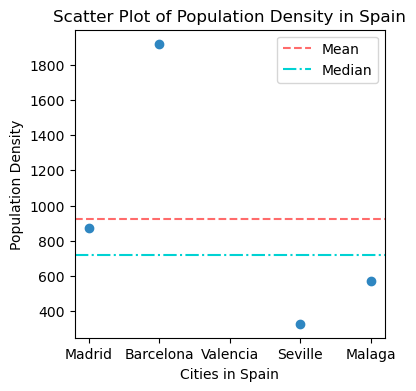

In [28]:
population_density_spain = df[df['Country'] == 'Spain']['Population Density']

mean_density = population_density_spain.mean()
median_density = population_density_spain.median()

print(f'Mean: {mean_density}')
print(f'Median: {median_density}')

x_vals = population_density_spain.index

plt.figure(figsize=(4, 4))
plt.scatter(x_vals, population_density_spain, color=C_PRIMARY)
plt.title('Scatter Plot of Population Density in Spain')
plt.xlabel('Cities in Spain')
plt.ylabel('Population Density')
plt.axhline(y=mean_density, color=C_NEGATIVE, linestyle='--', label='Mean')
plt.axhline(y=median_density, color=C_POSITIVE, linestyle='-.', label='Median')
plt.legend()

plt.show()

<div style="font-size:15px; line-height:1.3;">
We decide to impute the missing population density with the median (722.0) because it is less affected by extreme values or outliers than the mean, providing a more representative estimate of a typical city’s density in Spain.
</div>

In [29]:
df.loc['Valencia', 'Population Density'] = median_density

<br>

- <font color='#0EE071'> **Input Null in `Working Age Population`** </font>

In [30]:
df[df['Working Age Population'].isna()]

,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,,
Dusseldorf,Germany,1295.0,1554077,NaN,21.4,3.3,71238.0,3,NaN,3200,1100,2050,2024-01-15


<div style="font-size:15px; line-height:1.3;">
We first checked for missing values in the Working Age Population column and saw that Dusseldorf, Germany has a missing entry. Then we filtered the dataset to include only cities in Germany, calculated the ratio of the Working Age Population to the total Population, removed any missing values, and computed the mean and median of this ratio. Finally, we visualized the total population versus the working-age population for each German city in a bar chart.
</div>


Mean Age Population Ratio: 0.6521053338475745
Median Age Population Ratio: 0.6581699263597741


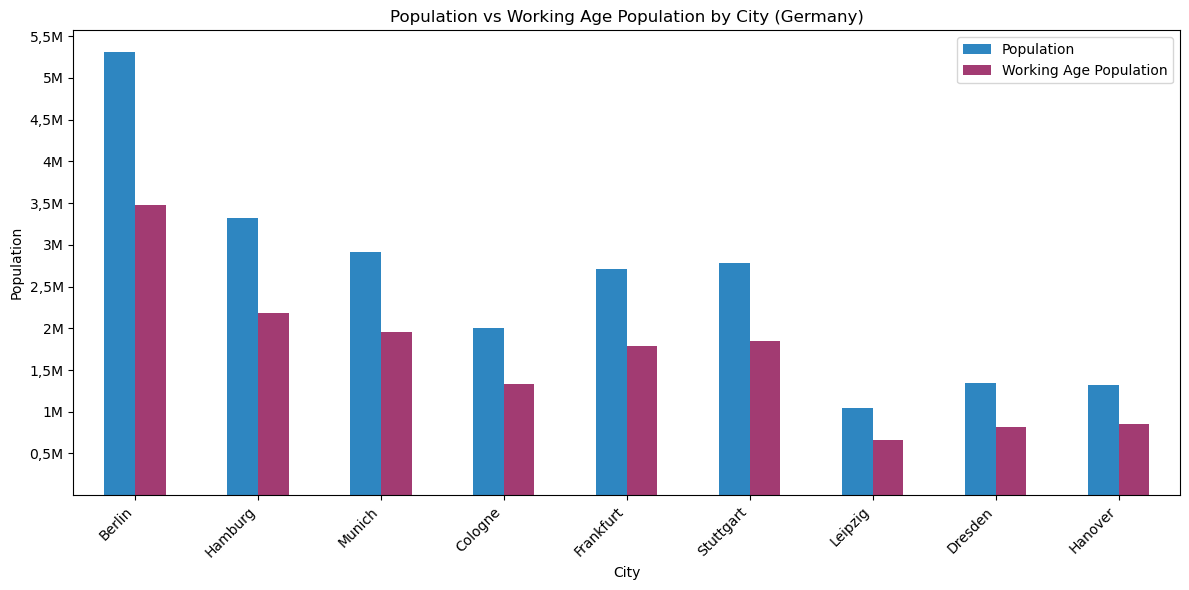

In [31]:
df_germany = df.loc[df['Country'] == 'Germany'].copy()
df_germany['Age_Pop_Ratio'] = df_germany['Working Age Population'] / df_germany['Population']
df_germany = df_germany.dropna(subset=['Age_Pop_Ratio'])

mean_ratio = df_germany['Age_Pop_Ratio'].mean()
median_ratio = df_germany['Age_Pop_Ratio'].median()
print(f"Mean Age Population Ratio: {mean_ratio}")
print(f"Median Age Population Ratio: {median_ratio}")

df_germany[['Population', 'Working Age Population']].plot.bar(figsize=(12,6),color=[C_PRIMARY, C_SECONDARY])
plt.title('Population vs Working Age Population by City (Germany)')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.yticks([500000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,4500000,5000000,5500000],
           ['0,5M','1M', '1,5M', '2M','2,5M','3M','3,5M','4M','4,5M','5M','5,5M'])
plt.tight_layout()

plt.show()

<div style="font-size:15px; line-height:1.3;">
We filled the missing value for the Working Age Population in Dusseldorf, Germany by multiplying the city’s total population by the median Age Population Ratio calculated from other German cities. This provides an estimated value consistent with the overall distribution of working-age population ratios in Germany.
</div>


In [32]:
df.loc['Dusseldorf', 'Working Age Population'] = df.loc['Dusseldorf', 'Population'] * median_ratio

<br>

- <font color='#0EE071'> **Input Null in `Unemployment Rate`** </font>

In [33]:
df[df['Unemployment Rate'].isna()]

,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,,
Gent,Belgium,552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17


<div style="font-size:15px; line-height:1.3;"> We first checked for missing values in the Unemployment Rate column and saw that Ghent, Belgium has a missing entry. Then we filtered the dataset to include only cities in Belgium, calculated the mean and median of the available Unemployment Rate values, and visualize each city’s Unemployment Rate in a scatter plot with horizontal lines for the mean and median. </div>

Mean: 7.5
Median: 6.2


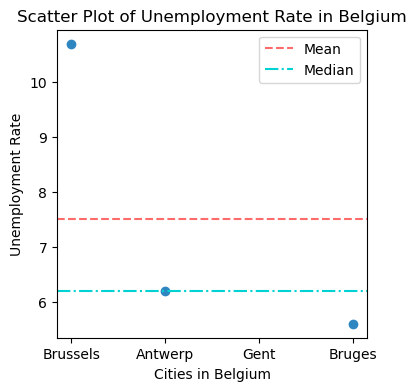

In [34]:
unemployment_rate_belgium = df[df['Country'] == 'Belgium']['Unemployment Rate']

mean_rate = unemployment_rate_belgium.mean()
median_rate = unemployment_rate_belgium.median()

print(f'Mean: {mean_rate}')
print(f'Median: {median_rate}')

x_vals = unemployment_rate_belgium.index

plt.figure(figsize=(4, 4))
plt.scatter(x_vals, unemployment_rate_belgium, color=C_PRIMARY)
plt.title('Scatter Plot of Unemployment Rate in Belgium')
plt.xlabel('Cities in Belgium')
plt.ylabel('Unemployment Rate')
plt.axhline(y=mean_rate, color=C_NEGATIVE, linestyle='--', label='Mean')
plt.axhline(y=median_rate, color=C_POSITIVE, linestyle='-.', label='Median')
plt.legend()

plt.show()

<div style="font-size:15px; line-height:1.3;">
We decide to impute the missing Unemployment Rate with the median (6.2) because it is less affected by extreme values or outliers than the mean, providing a more representative estimate of a typical city’s Unemployment Rate in Belgium.
</div>

In [35]:
df.loc['Gent', 'Unemployment Rate'] = median_rate

<br>

- <font color='#0EE071'> **Input Null in `GDP per Capita`** </font> 

In [36]:
df[df['GDP per Capita'].isna()]

,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,,
Lemesos,Cyprus,190.0,262238,173906.0,23.06,11.2,NaN,0,"Greek, English, Russian",2500,1400,2300,2023-08-14


<div style="font-size:15px; line-height:1.3;"> We first checked for missing GDP per capita values and found that Lemesos, Cyprus has a missing entry. Then, we filtered the GDP per capita data for all cities in Cyprus, calculated the mean and median, and printed these values to help decide how to impute the missing value. </div>


In [37]:
gdp_cyprus = df[df['Country'] == 'Cyprus']['GDP per Capita']

mean_gdp = gdp_cyprus.mean()
median_gdp = gdp_cyprus.median()

print(f'Mean: {mean_gdp}')
print(f'Median: {median_gdp}')

Mean: 34907.0
Median: 34907.0


<div style="font-size:15px; line-height:1.3;">We imputed the missing GDP per capita for Lemesos, Cyprus by assigning it the mean GDP per capita of all Cypriot cities, which is the same as the median in this case, providing a representative value for the missing entry.. </div>

In [38]:
df.loc['Lemesos', 'GDP per Capita'] = mean_gdp

<br>

- <font color='#0EE071'> **Input Null in `Main Spoken Languages`** </font> 

In [39]:
df[df['Main Spoken Languages'].isna()]

,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Average Rent Price,Average Cost of Living,Last Data Update
City,,,,,,,,,,,,,
Dusseldorf,Germany,1295.0,1554077,1.022847e+06,21.4,3.3,71238.0,3,NaN,3200,1100,2050,2024-01-15


<div style="font-size:15px; line-height:1.3;"> We first checked for missing values in the “Main Spoken Languages” column and found that Dusseldorf, Germany had a missing entry. Then, we filtered the dataset for German cities, removed rows with missing language information, split the languages listed in each city into separate entries, and counted the frequency of each language across all German cities, creating a DataFrame that shows each language and how often it appears. </div>

In [40]:
df_germany_temp = df.loc[df['Country'] == 'Germany'].copy()
df_germany_temp = df_germany_temp.dropna(subset=['Main Spoken Languages'])
df_germany_temp['Languages_List'] = df_germany_temp['Main Spoken Languages'].str.split(',')
df_germany_exploded = df_germany_temp.explode('Languages_List')
df_germany_exploded['Languages_List'] = df_germany_exploded['Languages_List'].str.strip()

germany_language_counts = df_germany_exploded['Languages_List'].value_counts()
germany_languages_df = pd.DataFrame({
    'Language': germany_language_counts.index,
    'Frequence': germany_language_counts.values
})

germany_languages_df

,Language,Frequence
0,German,9
1,English,5
2,Turkish,4
3,Arabic,1


<div style="font-size:15px; line-height:1.3;"> We use only the first (most frequent) language because it reflects the language most commonly spoken across German cities, making it the most representative option for imputing the missing value. Choosing any other language could misrepresent the typical linguistic profile of the city, while using the most frequent language provides a simple, data-driven way to fill the missing entry realistically. </div>

In [41]:
most_common_language = germany_language_counts.index[0]
df.loc['Dusseldorf', 'Main Spoken Languages'] = most_common_language

<br>

<div style="font-size:15px; line-height:1.3;">
<ul>
  <li>We then checked the dataset for any remaining missing values by using <code>df.isnull().sum()</code>, which counts how many entries are still missing in each column: </li>
</ul>
</div> 

In [42]:
df.isnull().sum()

Country                            0
Population Density                 0
Population                         0
Working Age Population             0
Youth Dependency Ratio             0
Unemployment Rate                  0
GDP per Capita                     0
Days of very strong heat stress    0
Main Spoken Languages              0
Average Monthly Salary             0
Average Rent Price                 0
Average Cost of Living             0
Last Data Update                   0
dtype: int64

<br>

> Handling Duplicates

<div style="font-size:15px; line-height:1.3;"> 
We already handle duplicates above, droping the lines duplicated by their index with the following code: </div>

```python
df['City'].duplicated().sum()
df[df['City'].duplicated(keep=False)] #to see both lines (not just one of each)
df = df.drop([16, 33], axis=0)

<div style="font-size:15px; line-height:1.3;"> 
Since the duplicated entries had identical values across all columns, they were considered redundant. Removing them (df.drop([16, 33], axis=0)) prevents artificial inflation of counts for these cities/countries and ensures statistical calculations are accurate. </div>

<br>

<hr style="border: 0.5px solid #0EE071">
<div style="font-size:15px; line-height:1.3;"> 
<strong>2. a)</strong> Which country appears most frequently in the dataset? How many cities are associated with it?</div>
<hr style="border: 0.5px solid #0EE071">

In [43]:
country_counts = df['Country'].value_counts()
print(f"Most frequent country: {country_counts.index[0]}")
print(f"Number of cities: {country_counts.values[0]}")

Most frequent country: Germany
Number of cities: 10


<br>

<hr style="border: 0.5px solid #0EE071">
<div style="font-size:15px; line-height:1.3;"> 
<strong>2. b)</strong> How many cities are present in total? How many are associated with Greece?</div>
<hr style="border: 0.5px solid #0EE071">

In [44]:
print(f"Total number of cities in dataset: {len(df)}")
print(f"Number of cities in Greece: {len(df[df['Country'] == 'Greece'])}")

Total number of cities in dataset: 84
Number of cities in Greece: 2


<br>

<hr style="border: 0.5px solid #0EE071">
<div style="font-size:15px; line-height:1.3;"> 
<strong>2. c)</strong> Which is the least spoken language in the dataset? Which are the top 3 most spoken languages?</div>
<hr style="border: 0.5px solid #0EE071">

In [45]:
df['Main Spoken Languages List'] = df['Main Spoken Languages'].str.split(',')
df_exploded = df.explode('Main Spoken Languages List')
df_exploded['Main Spoken Languages List'] = df_exploded['Main Spoken Languages List'].str.strip()

language_counts = df_exploded['Main Spoken Languages List'].value_counts()

print(f"The least spoken language in the data set is {language_counts.index[-1]}.")
print(f"Frequency: {language_counts.values[-1]} city/cities")

The least spoken language in the data set is Slovene.
Frequency: 1 city/cities


In [46]:
top_3_languages = language_counts.head(3).index.tolist()
print(f"The top 3 most spoken languages are:")
for language in top_3_languages:
    print(f"-{language}")

The top 3 most spoken languages are:
-English
-German
-Turkish


<br>

<hr style="border: 0.5px solid #0EE071">
<div style="font-size:15px; line-height:1.3;"> 
<strong>3. a)</strong> Entries uploaded before April 2023 need to be updated. Which cities would require an update?</div>
<hr style="border: 0.5px solid #0EE071">

In [47]:
april_date = pd.to_datetime('2023-04-01')
update = df[df['Last Data Update'] < april_date]

print("Cities requiring update:")
for need_update in update.index.to_list():
    print(f"-{need_update}")

Cities requiring update:
-Basel
-Munich
-Frankfurt
-Lyon
-Venice
-Gothenburg


<br>

<hr style="border: 0.5px solid #0EE071">
<div style="font-size:15px; line-height:1.3;"> 
<strong>3. b)</strong> How many days ago was the last update? On what day, month, and year did it occur?</div>
<hr style="border: 0.5px solid #0EE071">

In [48]:
most_recent_update = df['Last Data Update'].max()
current_date = datetime.now()
days_since_update = (current_date - most_recent_update).days

In [49]:
print(f"The last update was {days_since_update} days ago.")
print(f"Day: {most_recent_update.strftime('%A')}, {most_recent_update.strftime('%d')}")
print(f"Month: {most_recent_update.strftime('%B')}")
print(f"Year: {most_recent_update.year}")

The last update was 374 days ago.
Day: Thursday, 12
Month: December
Year: 2024


<br>

<hr style="border: 0.5px solid #0EE071">
<div style="font-size:15px; line-height:1.3;"> 
<strong>4. a)</strong> How are the Unemployment Rate and GDP per Capita distributed and related? What does this relationship suggest? Provide a visual representation.</div>
<hr style="border: 0.5px solid #0EE071">

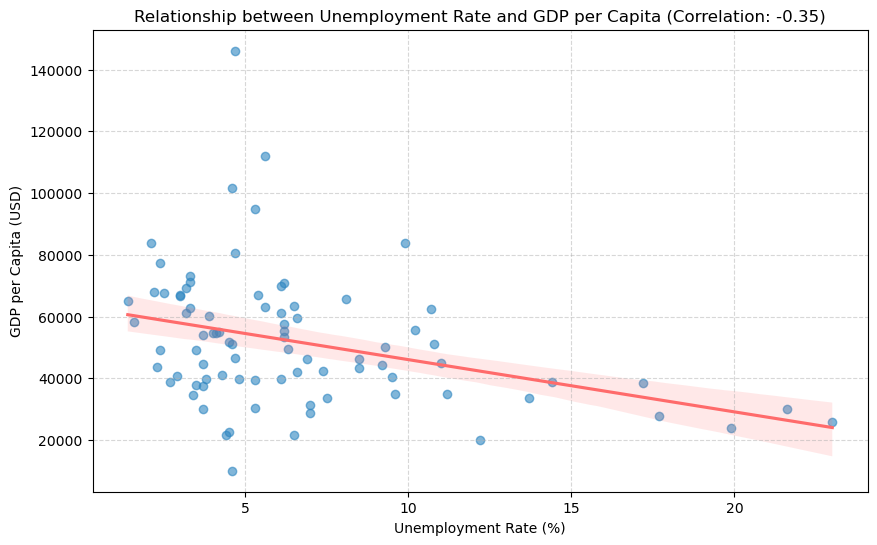

Correlation Coefficient (r): -0.35


In [50]:
correlation = df['Unemployment Rate'].corr(df['GDP per Capita'])

plt.figure(figsize=(10, 6))
sns.regplot(x='Unemployment Rate', y='GDP per Capita', data=df, 
            scatter_kws={'alpha':0.6, 'color': C_PRIMARY}, 
            line_kws={'color': C_NEGATIVE})
plt.title(f'Relationship between Unemployment Rate and GDP per Capita (Correlation: {correlation:.2f})')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('GDP per Capita (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print(f"Correlation Coefficient (r): {correlation:.2f}")

<strong>Analysis:

The analysis reveals a moderate negative correlation of approximately -0.35 between the Unemployment Rate and GDP per Capita. This inverse relationship suggests that cities with higher economic output generally tend to have lower unemployment rates, which aligns with the expectation that stronger economies create more employment opportunities. However, the distribution of data points shows significant variability around the regression line, indicating that the relationship is not strictly linear and that other structural factors likely influence unemployment levels alongside GDP.

<br>

<hr style="border: 0.5px solid #0EE071">
<div style="font-size:15px; line-height:1.3;"> 
<strong>4. b)</strong> Which are the top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living? What about the top 5 countries with the smallest average difference? Show these results with meaningful visualizations.</div>
<hr style="border: 0.5px solid #0EE071">

<div style="font-size:15px; line-height:1.3;">
<ul>
  <li>We create a new column that stores the absolute difference between the average monthly salary and the average cost of living for each city:
 </li>
</ul>
</div>

In [51]:
difference = df['Average Monthly Salary'] - df['Average Cost of Living']

# Keeps difference where difference >= 0, otherwise uses -difference
df['Salary_vs_CostLiv_Diff'] = difference.where(difference >= 0, -difference)

<div style="font-size:15px; line-height:1.3;">
<ul>
  <li>We select the top 5 cities with the largest salary vs. cost of living difference, keeping only the relevant columns for analysis:
</ul>
</div>

In [52]:
top_5_l = df.sort_values(by='Salary_vs_CostLiv_Diff', ascending=False).head(5)[['Country', 'Average Monthly Salary', 'Average Cost of Living', 'Salary_vs_CostLiv_Diff']]

<div style="font-size:15px; line-height:1.3;">
<ul>
  <li>We create a bar chart comparing the average monthly salary and average cost of living for the top 5 cities with the largest difference, customizing colors, axis labels, ticks, and layout for clarity:
</ul>
</div>

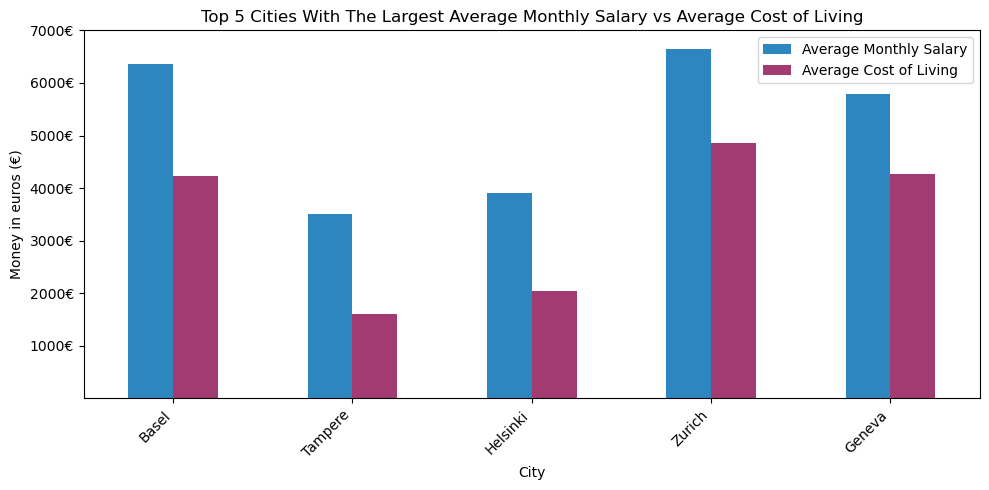

In [53]:
top_5_l[['Average Monthly Salary', 'Average Cost of Living']].plot.bar(figsize=(10,5),color=[C_PRIMARY, C_SECONDARY])
plt.title('Top 5 Cities With The Largest Average Monthly Salary vs Average Cost of Living')
plt.ylabel('Money in euros (€)')
plt.xticks(rotation=45, ha='right')
plt.yticks([1000,2000,3000,4000,5000,6000,7000],
           ['1000€','2000€','3000€','4000€','5000€','6000€','7000€'])
plt.tight_layout()

plt.show()

<div style="font-size:15px; line-height:1.3;">
<ul>
  <li>We calculate the average salary, cost of living, and their difference per country, sort by the smallest difference, and select the top 5 countries with the smallest average difference:
</ul>
</div>

In [54]:
country_avg = df.groupby('Country').agg({
    'Salary_vs_CostLiv_Diff': 'mean',
    'Average Monthly Salary': 'mean',
    'Average Cost of Living': 'mean'
}).sort_values(by='Salary_vs_CostLiv_Diff')

top_5 = country_avg.head(5)

<div style="font-size:15px; line-height:1.3;">
<ul>
  <li>We plot a bar chart of average salary vs cost of living for the 5 countries where the average difference between salary and cost of living is smallest, showing where earnings and expenses are most balanced:
</ul>
</div>

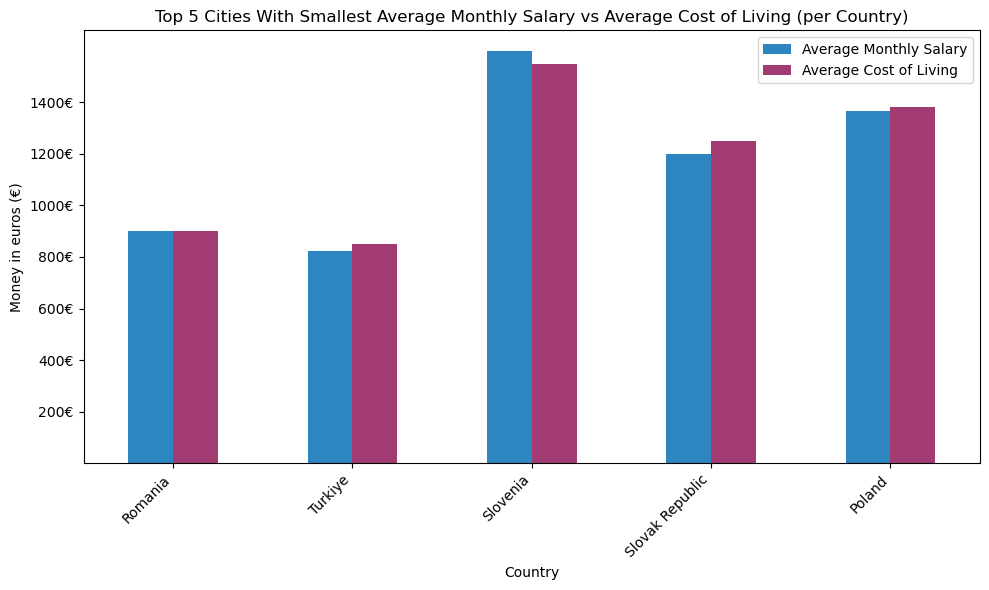

In [55]:
top_5[['Average Monthly Salary', 'Average Cost of Living']].plot.bar(figsize=(10,6), color=[C_PRIMARY, C_SECONDARY])
plt.title('Top 5 Cities With Smallest Average Monthly Salary vs Average Cost of Living (per Country)')
plt.ylabel('Money in euros (€)')
plt.xticks(rotation=45, ha='right')
plt.yticks([200,400,600,800,1000,1200,1400],
           ['200€','400€','600€','800€','1000€','1200€','1400€'])
plt.tight_layout()

plt.show()

<br>

<hr style="border: 0.5px solid #0EE071">
<div style="font-size:15px; line-height:1.3;"> 
<strong>4. c)</strong> Which is the best city for someone seeking: an average monthly salary above €2000, a cost of living below or equal to €1600, and with the lowest unemployment rate possible?</div>
<hr style="border: 0.5px solid #0EE071">

In [56]:
best_city_candidates = df[
    (df['Average Monthly Salary'] > 2000) &
    (df['Average Cost of Living'] <= 1600)
]

if not len(best_city_candidates)==0:
    best_city_by_unemployment = best_city_candidates.sort_values(by='Unemployment Rate').iloc[0]
    
    print(f"The best city for that criteria is: {best_city_by_unemployment.name}, {best_city_by_unemployment['Country']}")
else:
    print("No city simultaneously meets the criteria of Salary > €2000 and Cost of Living <= €1600.")

The best city for that criteria is: Dresden, Germany


<br>

<hr style="border: 0.5px solid #0EE071">
<div style="font-size:15px; line-height:1.3;"> 
<strong>5.</strong> What are three additional insights you find meaningful when comparing the given cities?</div>
<hr style="border: 0.5px solid #0EE071">

> Rent Burden

<div style="font-size:15px; line-height:1.3;"> 
Rent Burden measures the proportion of a person’s monthly salary that is spent on rent. <br>
We show the 20 cities with the highest rent burden, marking 60% as the recommended maximum.

</div>


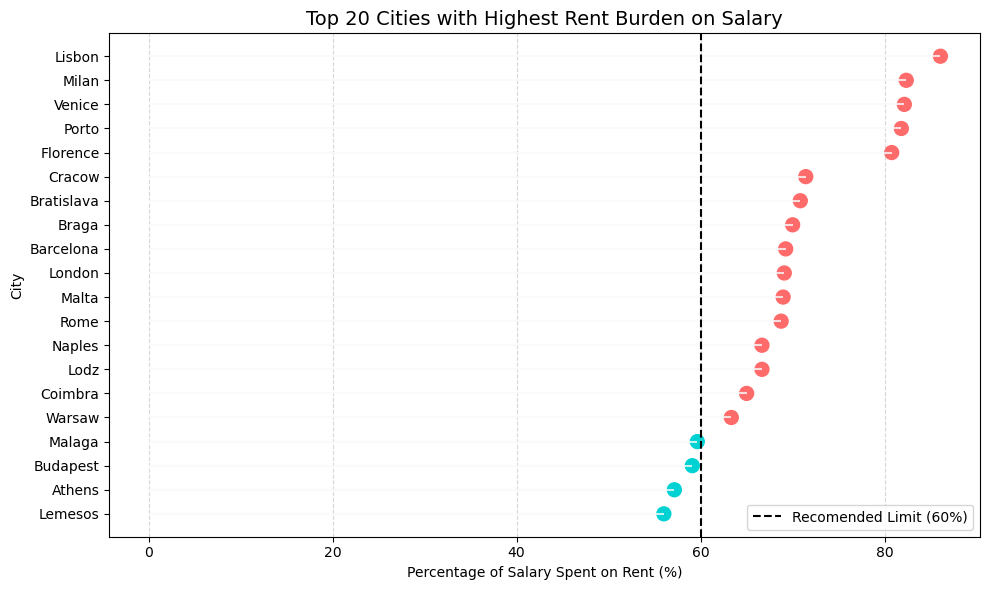

In [57]:
df['Rent_Burden'] = (df['Average Rent Price'] / df['Average Monthly Salary']) * 100

# Sort the entire DataFrame by 'Rent_Burden' in descending order and select the top 20 rows
top_burden = df.sort_values(by='Rent_Burden', ascending=False).head(20)

# Sort these top 20 rows in ascending order so that the smallest of the top 20 comes first
top_burden = top_burden.sort_values(by='Rent_Burden', ascending=True)

plt.figure(figsize=(10, 6))
plt.hlines(y=top_burden.index, xmin=0, xmax=top_burden['Rent_Burden'], color=C_LIGHT_GREY, alpha=0.8)
colors = [C_NEGATIVE if x > 60 else C_POSITIVE for x in top_burden['Rent_Burden']]
plt.scatter(top_burden['Rent_Burden'], top_burden.index, color=colors, s=100, alpha=1)
plt.axvline(x=60, color='black', linestyle='--', label='Recomended Limit (60%)')
plt.title('Top 20 Cities with Highest Rent Burden on Salary', fontsize=14)
plt.xlabel('Percentage of Salary Spent on Rent (%)')
plt.ylabel('City')
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

<br>

> Top 10 Countries with the Most Days of Extreme Heat

<div style="font-size:15px; line-height:1.3;"> 
We created a horizontal bar chart showing the 10 countries with the highest average number of days experiencing “very strong heat stress.” Each bar represents a country, with its length and color intensity showing the number of days. We also added the exact values next to the bars to make it easy to compare the countries.
</div>


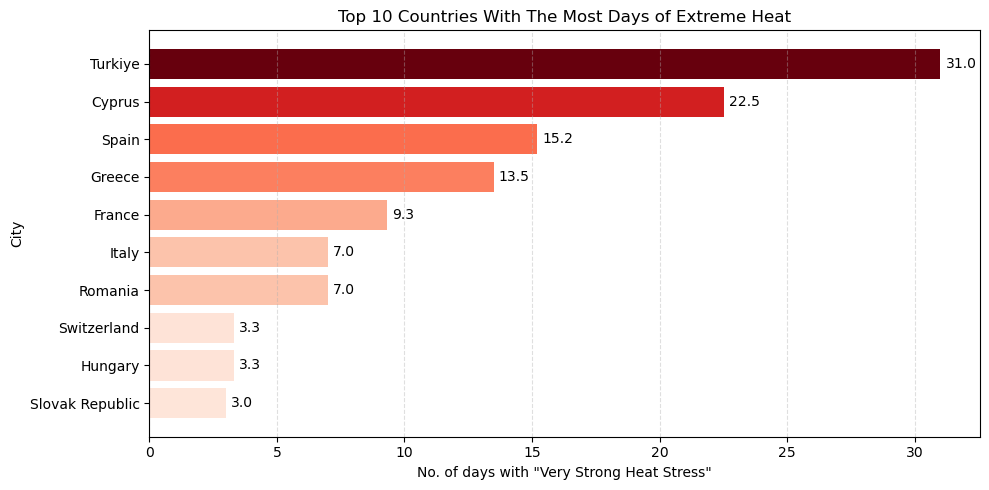

In [58]:
heat_stress = df.groupby('Country')['Days of very strong heat stress'].mean().sort_values()
heat_stress_top = heat_stress.tail(10)

plt.figure(figsize=(10, 5))
colors = plt.cm.Reds(heat_stress_top.values / heat_stress_top.max())
bars = plt.barh(heat_stress_top.index, heat_stress_top.values, color=colors)
plt.title('Top 10 Countries With The Most Days of Extreme Heat')
plt.xlabel('No. of days with "Very Strong Heat Stress"')
plt.ylabel('City')
plt.grid(axis='x', linestyle='--', alpha=0.4)

for bar in bars:
    width = round(bar.get_width(),1)
    plt.text(width + 0.2, bar.get_y() + bar.get_height()/2, f'{width:}', va='center')

plt.tight_layout()
plt.show()

<br>

> Disposable Income

<div style="font-size:15px; line-height:1.3;"> 
Disposable income is the amount of money a person has left after paying for essential expenses like rent, food, and utilities. We calculated disposable income by taking the average monthly salary and subtracting the average cost of living.<br>
<br>
We selected the top 10 cities with the highest disposable income and created a horizontal plot. Each city is represented by a line connecting its cost of living and salary, with markers and labels showing how much money residents really have left at the end of the month.

</div>

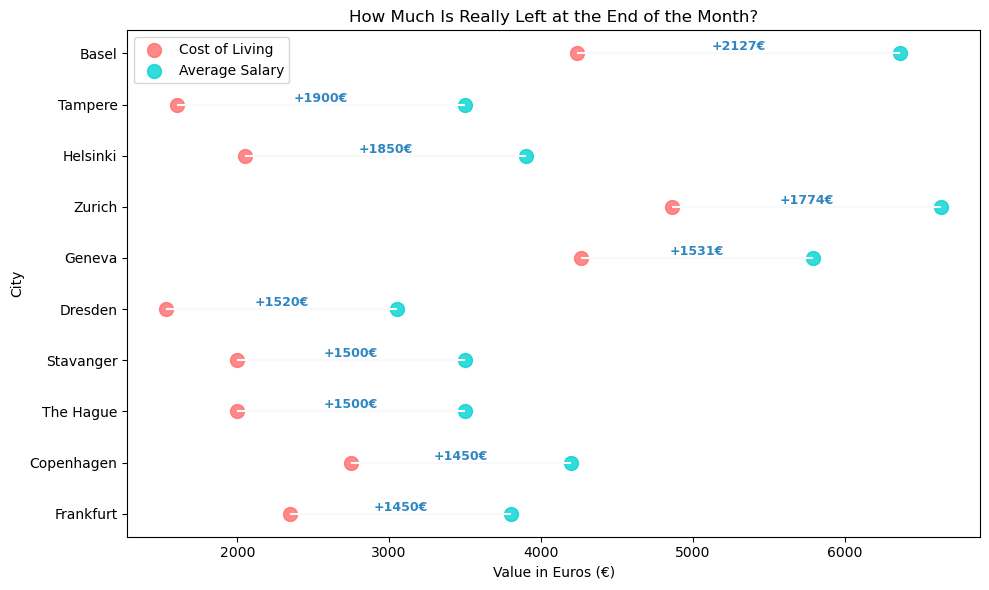

In [59]:
df['Disposable_Income'] = df['Average Monthly Salary'] - df['Average Cost of Living']

# Sort the DataFrame by 'Disposable_Income' descending and take the top 10
top_cities = df.sort_values(by='Disposable_Income', ascending=False).head(10)

# Sort these top 10 rows in ascending order so the smallest of the top 10 comes first
top_cities = top_cities.sort_values(by='Disposable_Income', ascending=True)

plt.figure(figsize=(10, 6))
plt.hlines(y=top_cities.index, xmin=top_cities['Average Cost of Living'], xmax=top_cities['Average Monthly Salary'], color=C_LIGHT_GREY, alpha=1)
plt.scatter(top_cities['Average Cost of Living'], top_cities.index, color=C_NEGATIVE, label='Cost of Living', s=100, alpha=0.8)
plt.scatter(top_cities['Average Monthly Salary'], top_cities.index, color=C_POSITIVE, label='Average Salary', s=100, alpha=0.8)

for i, (cost, salary) in enumerate(zip(top_cities['Average Cost of Living'], top_cities['Average Monthly Salary'])):
    diff = round(salary - cost, 0)
    plt.text((cost + salary)/2, i, f'+{diff:}€', va='bottom', ha='center', fontsize=9, color=C_PRIMARY, fontweight='bold')

plt.title('How Much Is Really Left at the End of the Month?')
plt.xlabel('Value in Euros (€)')
plt.ylabel('City')
plt.legend()
plt.tight_layout()
plt.show()

<br>

### <font color='#0EE071'>4. Advanced Topic - Building an Interactive Map </font> <a class="anchor" id="4"></a>
  [Back to TOC](#toc) 

#### **1. Web Scraping** <a class="anchor" id="4_1"></a>
<hr style="border: 0.5px solid #0EE071;">

In [60]:
def get_raw_string_by_search(driver, city, country):
    try:
        driver.get("https://en.wikipedia.org/wiki/Main_Page")
        driver.maximize_window()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "mp-topbanner")))
        search_box = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "searchInput")))
        query = f"{city}"
        search_box.clear()
        search_box.send_keys(query)
        driver.execute_script("document.getElementById('searchform').submit();")
        try:
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "firstHeading")))
        except Exception:
            print(f"[PAGE] Error: {city}, {country}")
            return None
        cur = driver.current_url
        html = driver.page_source
        soup = BeautifulSoup(html, "html.parser")
        geo_tag = soup.find("span", {"class": "geo"})
        if geo_tag and geo_tag.text.strip():
            coords = geo_tag.text.strip()
            return coords
        print(f"[COORD] Error: {city}, {country}")
        return None
    except Exception as e:
        print(f"[ERROR] {city} (Country: {country})")
        return None

raw_data_list = []

driver = webdriver.Chrome()
driver.maximize_window()

try:
    for city_name, row in df.iterrows():
        country_name = row["Country"]
        raw_text = get_raw_string_by_search(driver, city_name, country_name)
        raw_data_list.append(raw_text)
        if not raw_text:
            try:
                current_url = driver.current_url
            except WebDriverException:
                current_url = "N/A"
            print(f"Coordinates not found for city: {city_name} ")
        time.sleep(0.2)

finally:
    driver.quit()

df["Raw_Coordinates"] = raw_data_list

[COORD] Error: Gent, Belgium
Coordinates not found for city: Gent 
[COORD] Error: Split, Croatia
Coordinates not found for city: Split 
[COORD] Error: Cork, Ireland
Coordinates not found for city: Cork 


In [61]:
wiki_fix = {
    "Gent": "Ghent",
    "Cork": "Cork (city)",
    "Split": "Split, Croatia",
}

def get_raw_string_by_search(driver, city):
    try:
        driver.get("https://en.wikipedia.org/wiki/Main_Page")
        driver.maximize_window()
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "mp-topbanner")))
        search_box = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "searchInput")))
        query = city
        search_box.clear()
        search_box.send_keys(query)
        driver.execute_script("document.getElementById('searchform').submit();")
        try:
            WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, "firstHeading")))
        except Exception:
            print(f"[PAGE] Error: {city}")
            return None
        html = driver.page_source
        soup = BeautifulSoup(html, "html.parser")
        geo_tag = soup.find("span", {"class": "geo"})
        if geo_tag and geo_tag.text.strip():
            coords = geo_tag.text.strip()
            return coords
        print(f"[COORD] Error: {city}")
        return None

    except Exception as e:
        print(f"[ERROR] {city} ")
        return None
        
def fix_specific_cities_with_selenium(df):
    driver = webdriver.Chrome()
    driver.maximize_window()

    try:
        for wrong_name, correct_query in wiki_fix.items():
            if wrong_name not in df.index:
                continue
            raw_text = get_raw_string_by_search(driver, correct_query)
            if raw_text:
                df.loc[wrong_name, "Raw_Coordinates"] = raw_text
                print(f"{wrong_name} updated: '{raw_text}'")
            else:
                print(f"Coordinates not fixed for {wrong_name}")
            time.sleep(0.2)
    finally:
        driver.quit()
    return df

df = fix_specific_cities_with_selenium(df)

Gent updated: '51.05361; 3.72528'
Cork updated: '51.89722; -8.47000'
Split updated: '43.51000; 16.44000'


In [62]:
temp_coords = df['Raw_Coordinates'].str.split(';', expand=True)
df['Latitude'] = temp_coords[0].str.strip().astype(float)
df['Longitude'] = temp_coords[1].str.strip().astype(float)
df.drop(columns=['Raw_Coordinates'], inplace=True)

<br>

#### **2. Interactive Map** <a class="anchor" id="4_2"></a>
<hr style="border: 0.5px solid #0EE071;">

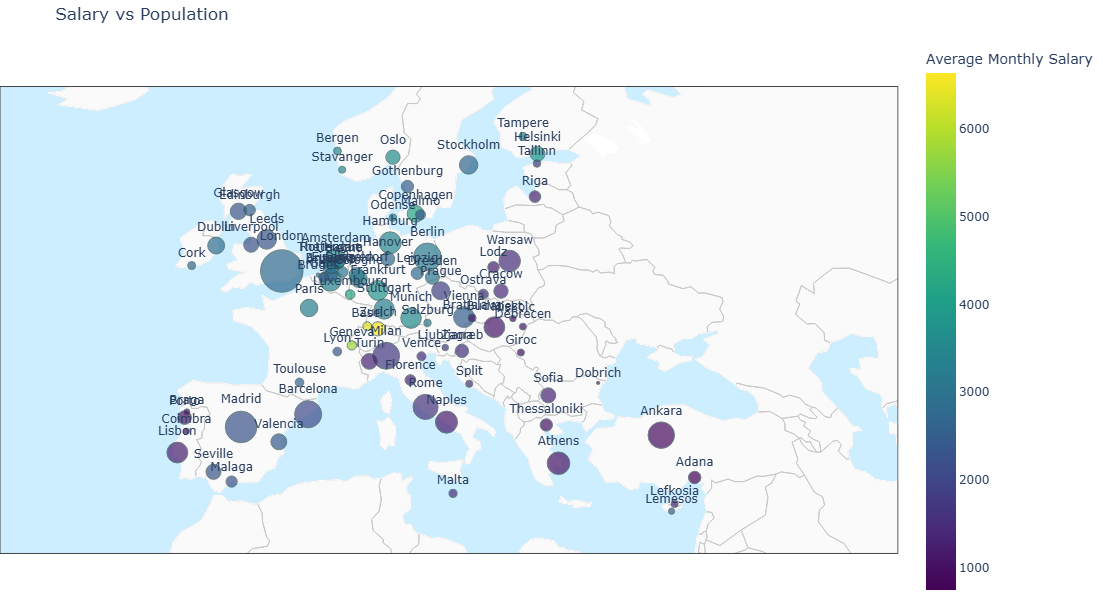

In [63]:
import plotly.express as px

df_map = df.reset_index()

import plotly.express as px

df_map['hover_text'] = df_map.apply(lambda row: (
    f"<b>{row['City']}</b>, {row['Country']}<br>"
    f"Population: {row['Population']:,.0f}<br>"
    f"Average Salary: €{row['Average Monthly Salary']:,.0f}<br>"
    f"Average Cost of Living: €{row['Average Cost of Living']:,.0f}<br>"
    f"Disposable Income: €{row['Disposable_Income']:,.0f}"
), axis=1)

fig = px.scatter_geo(
    df_map,
    lat='Latitude',
    lon='Longitude',
    color='Average Monthly Salary',
    size='Population',
    hover_name='City',
    text='City',
    color_continuous_scale='Viridis', 
    size_max=30,
    scope='world',
    custom_data=['hover_text'] 
)

fig.update_traces(
    hovertemplate="%{customdata[0]}<extra></extra>",
    textposition='top center',
    marker=dict(line=dict(width=1, color='DarkSlateGrey'))
)

fig.update_layout(
    title="Salary vs Population",
    geo=dict(
        projection_scale=5,
        center=dict(lat=48, lon=15),
        showland=True,
        landcolor="rgb(250, 250, 250)",
        showocean=True,
        oceancolor="rgb(204, 238, 255)",
        showcountries=True,
        countrycolor="rgb(200, 200, 200)",
        coastlinecolor="rgb(255, 255, 255)",
        projection_type='natural earth'
    ),
    margin=dict(l=0, r=0, t=40, b=0),
    height=600
)

fig.show()

### <font color='#0EE071'>5. Data Science In Action </font> <a class="anchor" id="5"></a>
  [Back to TOC](#toc) 

To decide which city best suits our preferences, we decided to build a **recommendation system**. To do this, we thought it was important to implement the **three variables** presented below:

| Variable                | Description                                                                                                                                                                                                 |
|-----------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Traffic Index**     | Index evaluates cities by their average travel time per 10km.          |
| **Health Care Index** | Estimates the overall quality of a healthcare system by evaluating key factors such as medical professionals, equipment, staff, doctors, and costs. It provides an assessment of the healthcare infrastructure, services, and resources available in a specific location. |
| **Crime Index**       | Estimates the overall level of crime in a city or country. It is categorized as follows: Very Low (<20), Low (20-40), Moderate (40-60), High (60-80), Very High (>80).                                                                          |

&nbsp;

#### **Traffic Index**
<hr style="border: 0.5px solid #0EE071;">


The **Traffic Index** variable was developed by scraping data from the [TomTom Traffic Index ranking](https://www.tomtom.com/traffic-index/ranking/). Specifically, the **average travel time per 10 km** was extracted for each city to serve as a proxy for traffic congestion.

The process involved the following steps:
1.  **Data Extraction:** Raw data was scraped from the website, capturing the travel time in a string format (e.g., "34 min 33 s");
2.  **Data Transformation:** The time strings were parsed and converted into a continuous numerical value (`float`) representing total minutes;
3.  **Integration:** This new variable was merged with the main city dataset based on city names;
4.  **Imputation:** Missing values for cities not covered by the TomTom index were imputed using the **K-Nearest Neighbors (KNN)** algorithm ($k=5$) to ensure data completeness without introducing significant bias.

In [64]:
options = Options()
browser = webdriver.Chrome(options=options)

url = "https://www.tomtom.com/traffic-index/ranking/"
browser.get(url)
time.sleep(5)

try:
    cookie_btn = browser.find_elements(By.CLASS_NAME, "cookie-panel-buttons__accept-all") 
    if cookie_btn:
        cookie_btn[0].click()
        print("Cookies accepted.")
        time.sleep(1)
except:
    print("Cookie button not found or not required.")
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(3)

try:
    metro_btn = browser.find_element(By.CSS_SELECTOR, "button[data-subcomponent-name='tab: Metro area']")
    browser.execute_script("arguments[0].click();", metro_btn)
    print("Metro Area selected.")
    time.sleep(5) 

except Exception as e:
    print(f"Button not found: {e}")

browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(3)

html_source = browser.page_source
browser.quit()

soupObj = BeautifulSoup(html_source, 'html.parser')

city_elements = soupObj.find_all(class_="sc-ee39d188-0 gZPaPP")
cities_list = []

for element in city_elements:
    full_text = element.get_text(separator="|").strip()
    city_name = full_text.split("|")[0].strip()
    cities_list.append(city_name)

time_elements = soupObj.find_all(class_="sc-e14224e6-5 dfTmKm")
times_list = [time.text.strip() for time in time_elements]

min_len = min(len(cities_list), len(times_list))
cities_list = cities_list[:min_len]
times_list = times_list[:min_len]

df_tomtom = pd.DataFrame({
    'City_TomTom': cities_list,
    'Traffic Index': times_list
})

print('df_tomtom created.')

Cookies accepted.
Metro Area selected.
df_tomtom created.


In [65]:
df_index = df.reset_index()
corr_cities = {
    'gent': 'ghent',
    'lefkosia': 'nicosia',
    'frankfurt': 'frankfurt am main',
    'malta':'valletta',
    'cracow':'krakow',
    'stockholm': 'stockholm metropolitan area'
}

df_index['City_Lower'] = df_index['City'].astype(str).str.lower().str.strip()
df_index['City_Lower'] = df_index['City_Lower'].replace(corr_cities)
df_tomtom['City_Lower'] = df_tomtom['City_TomTom'].astype(str).str.lower().str.strip()
df_tomtom = df_tomtom.drop_duplicates(subset=['City_Lower'], keep='first') #cities from diferent countries with the same name

df_final = pd.merge(df_index, df_tomtom[['City_Lower', 'Traffic Index']], on='City_Lower', how='left')
df_final.drop(columns=['City_Lower'], inplace=True)

In [66]:
df_final[df_final['Traffic Index'].isnull()]

,City,Country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,...,Average Rent Price,Average Cost of Living,Last Data Update,Main Spoken Languages List,Salary_vs_CostLiv_Diff,Rent_Burden,Disposable_Income,Latitude,Longitude,Traffic Index
7,Dobrich,Bulgaria,640.0,73895,46359.0,22.85,4.6,10089.92,0,"Bulgarian, Turkish",...,400,1100,2023-12-30,"[Bulgarian, Turkish]",100,33.333333,100,43.56700,27.83300,NaN
12,Lemesos,Cyprus,190.0,262238,173906.0,23.06,11.2,34907.00,0,"Greek, English, Russian",...,1400,2300,2023-08-14,"[Greek, English, Russian]",200,56.000000,200,34.67472,33.04417,NaN
24,Hanover,Germany,444.0,1316467,854349.0,21.00,4.0,54827.00,2,German,...,900,1800,2023-10-07,[German],1000,32.142857,1000,52.36700,9.71700,NaN
45,Zagreb,Croatia,240.0,1217131,800501.0,22.70,2.7,38664.00,4,Croatian,...,700,1330,2023-10-14,[Croatian],240,44.585987,240,45.81306,15.97750,NaN
46,Split,Croatia,120.0,354264,230745.0,22.90,6.5,21560.00,1,Croatian,...,600,1250,2023-09-30,[Croatian],250,40.000000,250,43.51000,16.44000,NaN
48,Miskolc,Hungary,172.0,283319,186102.0,24.10,4.4,21805.00,3,Hungarian,...,500,900,2023-11-18,[Hungarian],100,50.000000,100,48.10417,20.79167,NaN
49,Debrecen,Hungary,163.0,328409,219758.0,22.40,4.5,22648.00,7,Hungarian,...,450,950,2024-08-31,[Hungarian],50,45.000000,50,47.53167,21.62444,NaN
57,Venice,Italy,852.0,557748,347781.0,19.30,6.1,39681.00,6,Italian,...,1150,1500,2023-03-23,[Italian],100,82.142857,-100,45.43750,12.33583,NaN
76,Giroc,Romania,1500.0,351851,244969.0,21.20,3.4,34708.00,7,Romanian,...,450,900,2023-08-18,[Romanian],0,50.000000,0,45.70000,21.23300,NaN


In [67]:
def convert_time(value):
    if pd.isna(value) or value == "":
        return None
    min = 0
    match_min = re.search(r'(\d+)\s*min', value)
    if match_min:
        min = int(match_min.group(1))
    sec = 0
    match_sec = re.search(r'(\d+)\s*s', value)
    if match_sec:
        sec = int(match_sec.group(1))
    return min + (sec / 60)

df_final['Traffic Index'] = df_final['Traffic Index'].apply(convert_time)

In [68]:
num_cols = [
    'Population Density', 'Population', 'Working Age Population', 
    'Youth Dependency Ratio', 'Unemployment Rate', 'GDP per Capita', 
    'Average Monthly Salary', 'Average Rent Price', 
    'Average Cost of Living', 'Salary_vs_CostLiv_Diff','Rent_Burden',
    'Disposable_Income','Traffic Index'
]

imputer = KNNImputer(n_neighbors=5)
df_imputed_array = imputer.fit_transform(df_final[num_cols])
df_final[num_cols] = pd.DataFrame(df_imputed_array, columns=num_cols)

In [69]:
df_final['Traffic Index'].isnull().sum()

np.int64(0)

In [70]:
len(df_final['City'].tolist())

84

In [71]:
# Check values assigned with KNN
#idx_nul=[7,12,24,46,47,49,50,58,77]
#df_final.loc[idx_nul, ['City', 'Traffic Index']]

<br>

#### **Health Care Index**

<hr style="border: 0.5px solid #0EE071;">

The **Health Care Index** variable was developed by scraping data from the [Numbeo Health Care Rankings](https://www.numbeo.com/health-care/rankings.jsp). Specifically, the **Health Care Index** score was extracted for each city to serve as a proxy for healthcare quality and accessibility.

The process involved the following steps:

1. **Data Extraction:** Raw data was scraped from the website, capturing city names and index values from the rankings table;
2. **Data Transformation:** City names were cleaned and standardized (lowercase, stripped) for matching, with duplicates removed based on the cleaned city name;
3. **Integration:** The Health Care Index was merged with the main city dataset using the cleaned city name as the key (`left join`);
4. **Imputation:** Missing values were first filled by the country median (when available), then by the global mean to ensure data completeness without significan bias.


In [72]:
def get_numbeo_health_index():
    url = "https://www.numbeo.com/health-care/rankings.jsp"
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', {'id': 't2'})
    rows = table.find('tbody').find_all('tr')
    data = []
    for row in rows:
        cols = row.find_all('td')
        if len(cols) >= 2:
            full_name = cols[1].get_text(strip=True)
            index_val = float(cols[2].get_text(strip=True))
            parts = full_name.split(',')
            city_clean = parts[0].strip().lower()
            data.append({'City_Numbeo': full_name,
                        'City_Match': city_clean,
                        'Health Care Index': index_val})
    return pd.DataFrame(data)

df_health = get_numbeo_health_index()

if not df_health.empty:
    df_final['City_Match'] = df_final['City'].astype(str).str.lower().str.strip()
    df_health = df_health.drop_duplicates(subset=['City_Match'], keep='first')
    df_final = pd.merge(df_final, df_health[['City_Match', 'Health Care Index']], on='City_Match', how='left')
    df_final.drop(columns=['City_Match'], inplace=True)

else:
    print("No data founded.")

In [73]:
df_final['Health Care Index'].isnull().sum()

np.int64(22)

In [74]:
if 'Country' in df_final.columns:
    df_final['Health Care Index'] = df_final.groupby('Country')['Health Care Index'].transform(lambda x: x.fillna(x.median()))
    global_mean = df_final['Health Care Index'].mean()
    df_final['Health Care Index'] = df_final['Health Care Index'].fillna(global_mean)

else:
    print("'Country' not found.")
    df_final['Health Care Index'] = df_final['Health Care Index'].fillna(df_final['Health Care Index'].mean())

In [75]:
df_final['Health Care Index'].isnull().sum()

np.int64(0)

<br>

#### **Crime Index**
<hr style="border: 0.5px solid #0EE071;">

The **Crime Index** variable was developed by scraping data from the [Numbeo Crime Rankings](https://www.numbeo.com/crime/rankings.jsp). Specifically, the **Crime Index** score was extracted for each city to serve as a proxy for urban safety and crime levels.

The process involved the following steps:

1. **Data Extraction:** Raw data was scraped from the website, capturing city names and crime index values from the rankings table;
2. **Data Transformation:** City names were cleaned and standardized (lowercase, stripped) for matching, with duplicates removed based on the cleaned city name;
3. **Integration:** The Crime Index was merged with the main city dataset using the cleaned city name as the key (`left join`);
4. **Imputation:** Missing values were first filled by the country median (when available), then by the global mean to ensure data completeness without significant bias.

In [76]:
def get_numbeo_crime_index():
    url = "https://www.numbeo.com/crime/rankings.jsp"
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', {'id': 't2'})
    rows = table.find('tbody').find_all('tr')
    data = []
    for row in rows:
        cols = row.find_all('td')
        if len(cols) >= 2:
            full_name = cols[1].get_text(strip=True)
            index_val = float(cols[2].get_text(strip=True))
            parts = full_name.split(',')
            city_clean = parts[0].strip().lower()
            data.append({'City_Numbeo': full_name,
                        'City_Match': city_clean,
                        'Crime Index': index_val})
    return pd.DataFrame(data)

df_crime = get_numbeo_crime_index()

if not df_crime.empty:
    df_final['City_Match'] = df_final['City'].astype(str).str.lower().str.strip()
    df_crime = df_crime.drop_duplicates(subset=['City_Match'], keep='first')
    df_final = pd.merge(df_final, df_crime[['City_Match', 'Crime Index']], on='City_Match', how='left')
    df_final.drop(columns=['City_Match'], inplace=True)

else:
    print("No data founded.")

In [77]:
df_final['Crime Index'].isnull().sum()

np.int64(19)

In [78]:
if 'Country' in df_final.columns:
    df_final['Crime Index'] = df_final.groupby('Country')['Crime Index'].transform(lambda x: x.fillna(x.median()))
    global_mean = df_final['Crime Index'].mean()
    df_final['Crime Index'] = df_final['Crime Index'].fillna(global_mean)

else:
    print("'Country' not found.")
    df_final['Crime Index'] = df_final['Crime Index'].fillna(df_final['Crime Index'].mean())

In [79]:
df_final['Crime Index'].isnull().sum()

np.int64(0)

<br>

#### <font color='#0EE071'> **Recommendation System** <a class="anchor" id="5_1"></a>


This final section cleans the dataset, exports it for deployment, and automatically generates/launches a **Streamlit web application** for interactive city recommendations.

### Key Steps:
1. **Data Cleaning:** Removes index artifacts like "Unnamed: 0" columns generated by pandas;
2. **Export:** Saves the final clean dataset as `df_final.csv` for the app;
3. **App Generation:** Creates `where_should_i_live.py` with:
   - Weighted scoring system (0-10 sliders for 11+ metrics);
   - Hard constraints/filters (min/max values);
   - Top 5 ranking table + bar chart;
   - Radar chart comparison (normalized 0-100%);
   - Podium visualization.
4. **Auto-Launch:** Starts Streamlit on `localhost:8502` and opens in browser.

The app uses **percentile ranking** for fair comparisons across metrics (higher=better metrics get boosted, lower=better get inverted), making it intuitive for end-users to find their ideal city.


In [80]:
print("Preparing dashboard...")
print(f"{len(df_final)} cities loaded from notebook.")

if "Unnamed: 0" in df_final.columns:
    df_final = df_final.drop(columns=["Unnamed: 0"])
    print("Removed column 'Unnamed: 0'.")

df_final.to_csv("df_final_clean.csv", index=False)
print("Saved df_final_clean.csv!")

app_code = '''
import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Color palette
C_PRIMARY    = '#2E86C1'
C_SECONDARY  = '#A23B72'
C_POSITIVE   = '#00D2D3'
C_NEGATIVE   = '#FF6B6B'
C_LIGHT_GREY = '#F8F9FA'

st.set_page_config(layout="wide", page_title="Where Should I Live?")

# Basic styling
st.markdown(
    f"""
    <style>
    .main {{
        background-color: #F8FAFF;
    }}
    .block-container {{
        padding-top: 1rem;
        padding-bottom: 2rem;
    }}
    .stMetric label {{
        font-weight: 600;
    }}
    </style>
    """,
    unsafe_allow_html=True,
)

@st.cache_data
def load_data():
    df = pd.read_csv("df_final_clean.csv")
    if "Unnamed: 0" in df.columns:
        df = df.drop(columns=["Unnamed: 0"])
    if "City" in df.columns:
        df = df.set_index("City")
    return df

df_final = load_data()

st.title("Where Should I Live?")
st.markdown(
    "An interactive dashboard that uses your own dataset to recommend the best cities "
    "based on your priorities."
)

col1, col2, col3 = st.columns(3)
with col1:
    st.metric("Number of cities", len(df_final))
with col2:
    n_countries = df_final["Country"].nunique() if "Country" in df_final.columns else "N/A"
    st.metric("Number of countries", n_countries)
with col3:
    st.metric("Columns available", len(df_final.columns))

@st.cache_data
def recommend_cities(df, weights, constraints=None):
    df_pro = df.copy()

    if constraints:
        for col, (typ, val) in constraints.items():
            if col in df_pro.columns:
                if typ == "max":
                    df_pro = df_pro[df_pro[col] <= val]
                elif typ == "min":
                    df_pro = df_pro[df_pro[col] >= val]

    if len(df_pro) == 0:
        return None

    # True = higher is better, False = lower is better
    config = {
        "Average Monthly Salary": True,
        "Salary_vs_CostLiv_Diff": True,   # your net income column
        "GDP per Capita": True,
        "Health Care Index": True,
        "Population": True,
        "Unemployment Rate": False,
        "Average Rent Price": False,
        "Average Cost of Living": False,
        "Crime Index": False,
        "Traffic Index": False,
        "Days of very strong heat stress": False,
    }

    df_pro["score"] = 0.0
    total_weight = sum(weights[col] for col in weights if col in df_pro.columns)

    for col, higher_is_better in config.items():
        if col in df_pro.columns and col in weights and weights[col] > 0:
            rank = df_pro[col].rank(pct=True)
            if not higher_is_better:
                rank = 1 - rank
            df_pro["score"] += rank * weights[col]

    if total_weight > 0:
        df_pro["Match %"] = (df_pro["score"] / total_weight * 100).round(1)
    else:
        df_pro["Match %"] = 0.0

    return df_pro.sort_values("Match %", ascending=False)

st.header("Preference weights (0–10)")

weight_options = {
    "Salary_vs_CostLiv_Diff": {
        "label": "Disposable Income",
        "desc": "Difference between salary and cost of living (higher = more money left each month).",
    },
    "Crime Index": {
        "label": "Crime Index",
        "desc": "Overall crime level in the city (lower = safer).",
    },
    "Health Care Index": {
        "label": "Health Care Index",
        "desc": "Quality and accessibility of healthcare services (higher = better).",
    },
    "Average Monthly Salary": {
        "label": "Average Monthly Salary",
        "desc": "Average gross monthly salary in the city (higher = better).",
    },
    "GDP per Capita": {
        "label": "GDP per Capita",
        "desc": "Economic development level of the country (higher = wealthier).",
    },
    "Population": {
        "label": "Population",
        "desc": "Total city population (higher = larger city, more services and opportunities).",
    },
    "Unemployment Rate": {
        "label": "Unemployment Rate",
        "desc": "Percentage of people without jobs (lower = more job security).",
    },
    "Average Rent Price": {
        "label": "Average Rent Price",
        "desc": "Average monthly rent (lower = more affordable housing).",
    },
    "Average Cost of Living": {
        "label": "Average Cost of Living",
        "desc": "Average monthly cost for basic expenses (lower = cheaper to live).",
    },
    "Traffic Index": {
        "label": "Traffic Index",
        "desc": "Traffic congestion and travel time (lower = faster commuting).",
    },
    "Days of very strong heat stress": {
        "label": "Days of very strong heat stress",
        "desc": "Number of extremely hot days (lower = more climate comfort).",
    },
}

weights = {}
for col, meta in weight_options.items():
    if col in df_final.columns:
        st.markdown(f"**{meta['label']}**")
        st.caption(meta["desc"])
        weights[col] = st.slider(
            f"Weight for {col}",
            min_value=0,
            max_value=10,
            value=0,
            step=1,
            key=f"w_{col}",
        )

st.header("Hard filters (optional)")

constraint_cols = st.columns(3)
constraints = {}
for idx, (col, meta) in enumerate(weight_options.items()):
    if col in df_final.columns:
        with constraint_cols[idx % 3]:
            choice = st.selectbox(
                f"Filter on {meta['label']}",
                ["None", "Maximum", "Minimum"],
                key=f"filter_{col}",
            )
            if choice != "None":
                mn = float(df_final[col].min())
                mx = float(df_final[col].max())
                default_val = (mn + mx) / 2
                val = st.number_input(
                    f"{choice} allowed for {col}",
                    min_value=mn,
                    max_value=mx,
                    value=default_val,
                    key=f"filter_value_{col}",
                )
                constraints[col] = ("max" if choice == "Maximum" else "min", val)

st.markdown("---")

if st.button("Compute Top 5 cities", type="primary", use_container_width=True):
    result = recommend_cities(df_final, weights, constraints)

    if result is not None and len(result) > 0:
        st.success("Top 5 cities calculated based on your preferences.")

        top5 = result[["Country", "Match %"]].head(5)
        top5.index.name = "City"

        st.subheader("Top 5 cities")
        st.dataframe(
            top5.style.format({"Match %": "{:.1f}%"}),
            use_container_width=True,
        )

        top5_plot = result.head(5).reset_index()  # City, Country, Match %

        st.subheader("Podium")
        c1, c2, c3 = st.columns(3)
        c1.metric("1st", top5_plot.iloc[0]["City"], f"{top5_plot.iloc[0]['Match %']:.1f}%")
        if len(top5_plot) > 1:
            c2.metric("2nd", top5_plot.iloc[1]["City"], f"{top5_plot.iloc[1]['Match %']:.1f}%")
        if len(top5_plot) > 2:
            c3.metric("3rd", top5_plot.iloc[2]["City"], f"{top5_plot.iloc[2]['Match %']:.1f}%")

        st.subheader("Overall suitability score (%)")
        fig1 = px.bar(
            top5_plot,
            x="Match %",
            y="City",
            orientation="h",
            color="Match %",
            text="Match %",
            color_continuous_scale=[C_NEGATIVE, C_SECONDARY, C_POSITIVE],
        )
        fig1.update_traces(texttemplate="%{text:.1f}%", textposition="outside")
        fig1.update_layout(
            xaxis_title="Match to your preferences (%)",
            yaxis_title="City",
            height=400,
            plot_bgcolor="white",
        )
        st.plotly_chart(fig1, use_container_width=True)

        economic_cols = [
            "Average Monthly Salary",
            "Average Cost of Living",
            "Average Rent Price",
            "Salary_vs_CostLiv_Diff",
        ]
        available_econ = [c for c in economic_cols if c in df_final.columns]
        if available_econ:
            st.subheader("Economic profile of Top 5 cities")
            econ = top5_plot[["City"] + available_econ].melt(
                id_vars="City", var_name="Metric", value_name="Value"
            )
            econ_palette = {
                "Average Monthly Salary": C_PRIMARY,
                "Average Cost of Living": C_NEGATIVE,
                "Average Rent Price": C_SECONDARY,
                "Salary_vs_CostLiv_Diff": C_POSITIVE,
            }
            fig2 = px.bar(
                econ,
                x="City",
                y="Value",
                color="Metric",
                barmode="group",
                color_discrete_map=econ_palette,
            )
            fig2.update_layout(
                xaxis_title="City",
                yaxis_title="Amount (same currency as your dataset)",
                height=450,
                plot_bgcolor="white",
            )
            st.plotly_chart(fig2, use_container_width=True)

        risk_cols = ["Crime Index", "Unemployment Rate", "Traffic Index"]
        available_risk = [c for c in risk_cols if c in df_final.columns]
        if available_risk:
            st.subheader("Safety and mobility indicators")
            risk = top5_plot[["City"] + available_risk].melt(
                id_vars="City", var_name="Metric", value_name="Value"
            )
            risk_palette = {
                "Crime Index": C_NEGATIVE,
                "Unemployment Rate": C_SECONDARY,
                "Traffic Index": C_LIGHT_GREY,
            }
            fig3 = px.bar(
                risk,
                x="City",
                y="Value",
                color="Metric",
                barmode="group",
                color_discrete_map=risk_palette,
            )
            fig3.update_layout(
                xaxis_title="City",
                yaxis_title="Index / percentage (original units)",
                height=450,
                plot_bgcolor="white",
            )
            st.plotly_chart(fig3, use_container_width=True)

        active_cols = [
            c for c in weight_options
            if c in df_final.columns and weights.get(c, 0) > 0
        ]
        if len(active_cols) >= 3:
            st.subheader("Normalized comparison across active criteria (0–100%)")

            top5_radar = top5_plot[["City"] + active_cols].copy()

            config_for_radar = {
                "Average Monthly Salary": True,
                "Salary_vs_CostLiv_Diff": True,
                "GDP per Capita": True,
                "Health Care Index": True,
                "Population": True,
                "Unemployment Rate": False,
                "Average Rent Price": False,
                "Average Cost of Living": False,
                "Crime Index": False,
                "Traffic Index": False,
                "Days of very strong heat stress": False,
            }

            for col in active_cols:
                higher_is_better = config_for_radar.get(col, True)
                ranks = top5_radar[col].rank(pct=True)
                if not higher_is_better:
                    ranks = 1 - ranks
                top5_radar[col] = (ranks * 100).round(1)

            fig_r = go.Figure()
            radar_colors = [C_PRIMARY, C_SECONDARY, C_POSITIVE, C_NEGATIVE, "#74B9FF"]
            for i, (_, row) in enumerate(top5_radar.iterrows()):
                fig_r.add_trace(
                    go.Scatterpolar(
                        r=[row[c] for c in active_cols],
                        theta=active_cols,
                        fill="toself",
                        name=row["City"],
                        line_color=radar_colors[i % len(radar_colors)],
                    )
                )

            fig_r.update_layout(
                polar=dict(
                    radialaxis=dict(range=[0, 100], tickvals=[0, 25, 50, 75, 100])
                ),
                showlegend=True,
                height=500,
                plot_bgcolor="white",
            )
            st.plotly_chart(fig_r, use_container_width=True)

    else:
        st.warning("No city satisfies your filters. Try relaxing some constraints or weights.")
'''

with open("where_should_i_live.py", "w", encoding="utf-8") as f:
    f.write(app_code)

print("where_should_i_live.py written.")

def launch_app():
    subprocess.Popen(
        ["streamlit", "run", "where_should_i_live.py", "--server.headless", "true", "--server.port", "8502"],
        stdout=subprocess.DEVNULL,
        stderr=subprocess.STDOUT,
    )

thread = threading.Thread(target=launch_app, daemon=True)
thread.start()

time.sleep(3)
webbrowser.open("http://localhost:8502")
print("Dashboard opened at http://localhost:8502")

Preparing dashboard...
84 cities loaded from notebook.
Saved df_final_clean.csv!
where_should_i_live.py written.
Dashboard opened at http://localhost:8502
